In [1]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent visualization style
sns.set_theme(style="whitegrid")


In [2]:

# Load cleaned datasets
ball = pd.read_csv('C:/Users/Aditya/OneDrive - University of Hertfordshire/Project_2/outputs/ball_by_ball_cleaned.csv')
match = pd.read_csv('C:/Users/Aditya/OneDrive - University of Hertfordshire/Project_2/outputs/match_cleaned.csv')
player = pd.read_csv('C:/Users/Aditya/OneDrive - University of Hertfordshire/Project_2/outputs/player_cleaned.csv')
player_match = pd.read_csv('C:/Users/Aditya/OneDrive - University of Hertfordshire/Project_2/outputs/player_match_cleaned.csv')
season = pd.read_csv('C:/Users/Aditya/OneDrive - University of Hertfordshire/Project_2/outputs/season_cleaned.csv')
team = pd.read_csv('C:/Users/Aditya/OneDrive - University of Hertfordshire/Project_2/outputs/team_cleaned.csv')
merged_data = pd.read_csv('C:/Users/Aditya/OneDrive - University of Hertfordshire/Project_2/merged_player_data_with_roles_and_wickets_new.csv')
# Display initial information about datasets
print("Ball by Ball Dataset:")
print(ball.head())

print("Match Dataset:")
print(match.head())

print("Player Dataset:")
print(player.head())

print("Player Match Dataset:")
print(player_match.head())

print("Season Dataset:")
print(season.head())

print("Team Dataset:")
print(team.head())


Ball by Ball Dataset:
   Match_Id  Innings_Id  Over_Id  Ball_Id  Team_Batting_Id  Team_Bowling_Id  \
0    335987           1        1        1                1                2   
1    335987           1        1        2                1                2   
2    335987           1        1        3                1                2   
3    335987           1        1        4                1                2   
4    335987           1        1        5                1                2   

   Batsman_Id  Striker_Batting_Position  Runner_Id  Bowler_Id Batsman_Scored  \
0           1                         1          2         14              0   
1           2                         2          1         14              0   
2           2                         2          1         14              0   
3           2                         2          1         14              0   
4           2                         2          1         14              0   

  Extra_Type Extra_Run

Top Run Scorers:
     Batsman_Id  Batsman_Scored     Player_Name
20           21          4106.0        SK Raina
7             8          4105.0         V Kohli
56           57          3874.0       RG Sharma
39           40          3634.0       G Gambhir
161         162          3447.0        CH Gayle
45           46          3390.0      RV Uthappa
186         187          3373.0       DA Warner
109         110          3270.0  AB de Villiers
19           20          3270.0        MS Dhoni
41           42          3082.0        S Dhawan


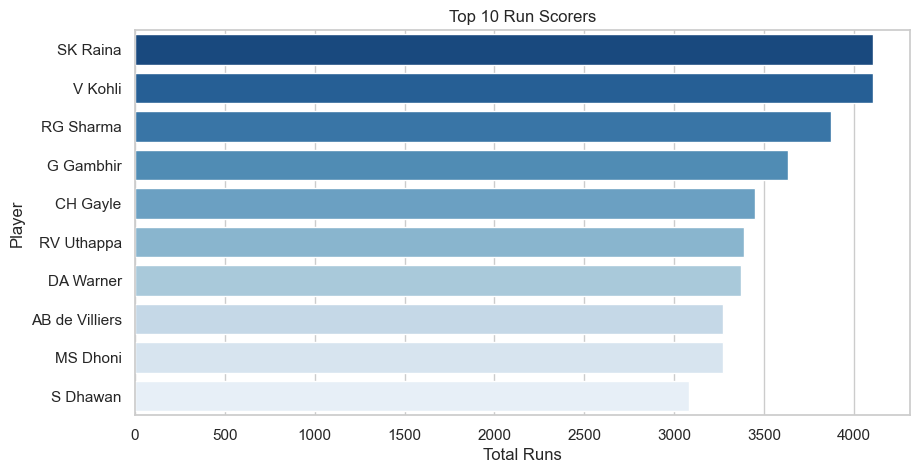

In [3]:

# Calculate total runs scored by each batsman
ball["Batsman_Scored"] = pd.to_numeric(ball["Batsman_Scored"], errors="coerce")
top_scorers = ball.groupby("Batsman_Id")["Batsman_Scored"].sum().reset_index()

# Map Batsman_Id to Player_Name
player_names = dict(zip(player["Player_Id"], player["Player_Name"]))
top_scorers["Player_Name"] = top_scorers["Batsman_Id"].map(player_names)

# Sort and select top 10 scorers
top_scorers = top_scorers.sort_values(by="Batsman_Scored", ascending=False).head(10)
print("Top Run Scorers:")
print(top_scorers)

# Plot top 10 run scorers
plt.figure(figsize=(10, 5))
sns.barplot(data=top_scorers, x="Batsman_Scored", y="Player_Name", palette="Blues_r")
plt.title("Top 10 Run Scorers")
plt.xlabel("Total Runs")
plt.ylabel("Player")
plt.show()


In [24]:

# Orange Cap Holder
orange_cap = top_scorers.iloc[0]
print(f"Most runs by player: {orange_cap['Player_Name']} with {orange_cap['Batsman_Scored']} runs.")

# Purple Cap Holder
purple_cap = top_wicket_takers.iloc[0]
print(f"Most wickets by player: {purple_cap['Player_Name']} with {purple_cap['Wickets']} wickets.")


Most runs by player: SK Raina with 4106.0 runs.
Most wickets by player: Harbhajan Singh with 2742 wickets.


Matches Played at Each Venue:
M Chinnaswamy Stadium                                   58
Eden Gardens                                            54
Feroz Shah Kotla                                        53
Wankhede Stadium                                        49
MA Chidambaram Stadium, Chepauk                         48
Rajiv Gandhi International Stadium, Uppal               41
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       11
Himachal Pradesh Cricket Association Stadium             9
New Wanderers Stadium     

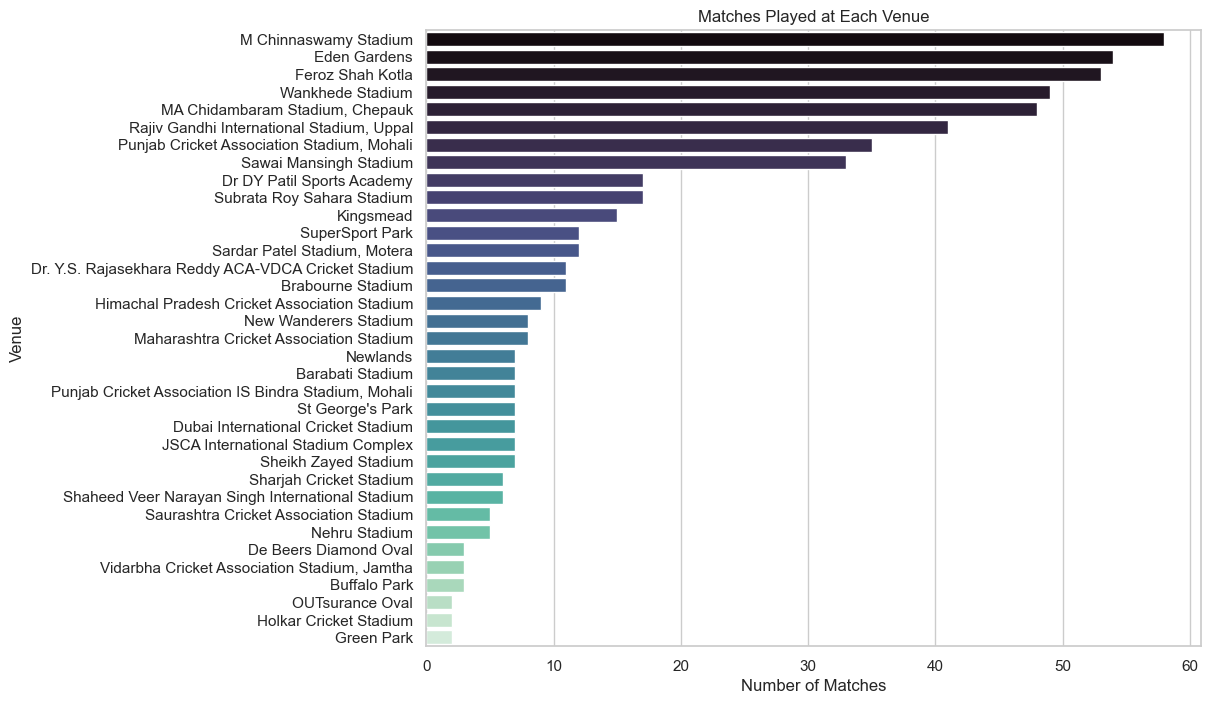

In [6]:

# Calculate matches played at each venue
venue_counts = match["Venue_Name"].value_counts()
print("Matches Played at Each Venue:")
print(venue_counts)

# Plot matches played at each venue
plt.figure(figsize=(10, 8))
sns.barplot(x=venue_counts.values, y=venue_counts.index, orient="h", palette="mako")
plt.title("Matches Played at Each Venue")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.show()


Teams with Most Wins:
Mumbai Indians                 80
Chennai Super Kings            79
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Rajasthan Royals               63
Kings Xi Punjab                63
Delhi Daredevils               56
Sunrisers Hyderabad            34
Deccan Chargers                29
Pune Warriors                  12
Gujarat Lions                   9
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: Match_Winner, dtype: int64


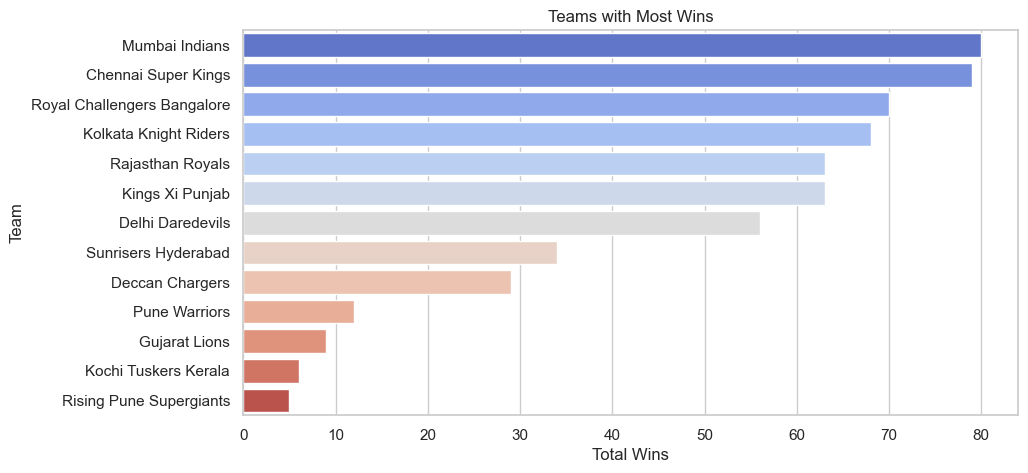

In [7]:

# Map Team IDs to Team Names
team_names = dict(zip(team["Team_Id"], team["Team_Name"]))
match["Match_Winner"] = match["Match_Winner_Id"].map(team_names)

# Calculate total wins by each team
team_wins = match["Match_Winner"].value_counts()
print("Teams with Most Wins:")
print(team_wins)

# Plot teams with most wins
plt.figure(figsize=(10, 5))
sns.barplot(x=team_wins.values, y=team_wins.index, palette="coolwarm")
plt.title("Teams with Most Wins")
plt.xlabel("Total Wins")
plt.ylabel("Team")
plt.show()


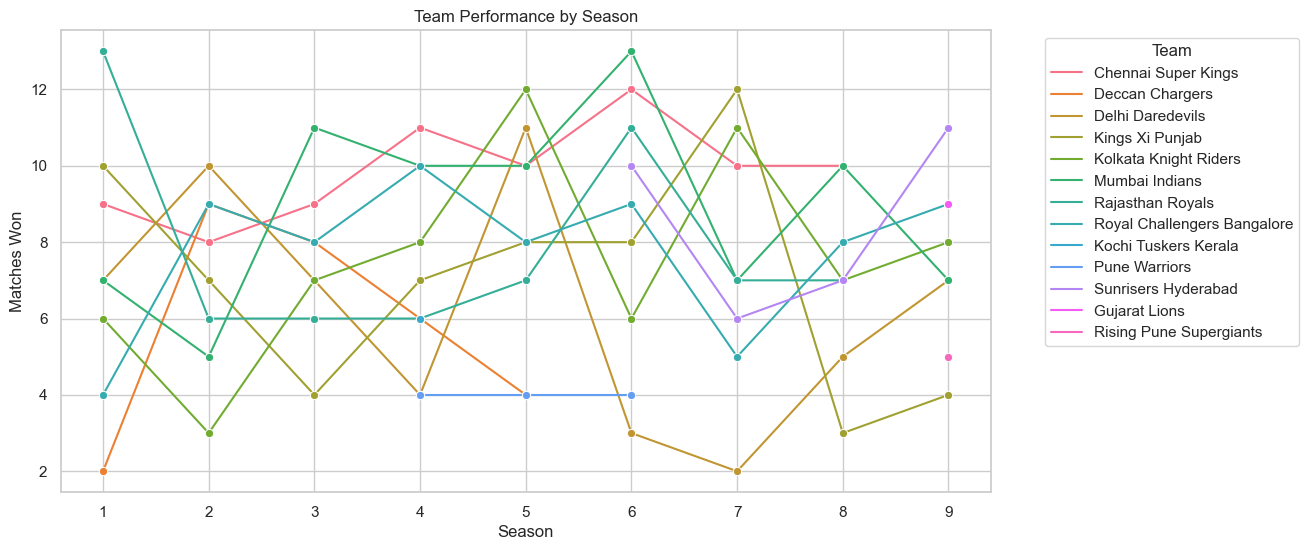

In [8]:

# Group by season and winner to calculate matches won per season
team_performance = match.groupby(["Season_Id", "Match_Winner"]).size().reset_index(name="Wins")

# Plot team performance trends by season
plt.figure(figsize=(12, 6))
sns.lineplot(data=team_performance, x="Season_Id", y="Wins", hue="Match_Winner", marker="o")
plt.title("Team Performance by Season")
plt.xlabel("Season")
plt.ylabel("Matches Won")
plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [9]:
dismisal = ball['Dissimal_Type']
dismisal = dismisal.replace([' '],np.nan)
dismisal.dropna(axis = 0, inplace = True)
dismisal_count= dismisal.value_counts()

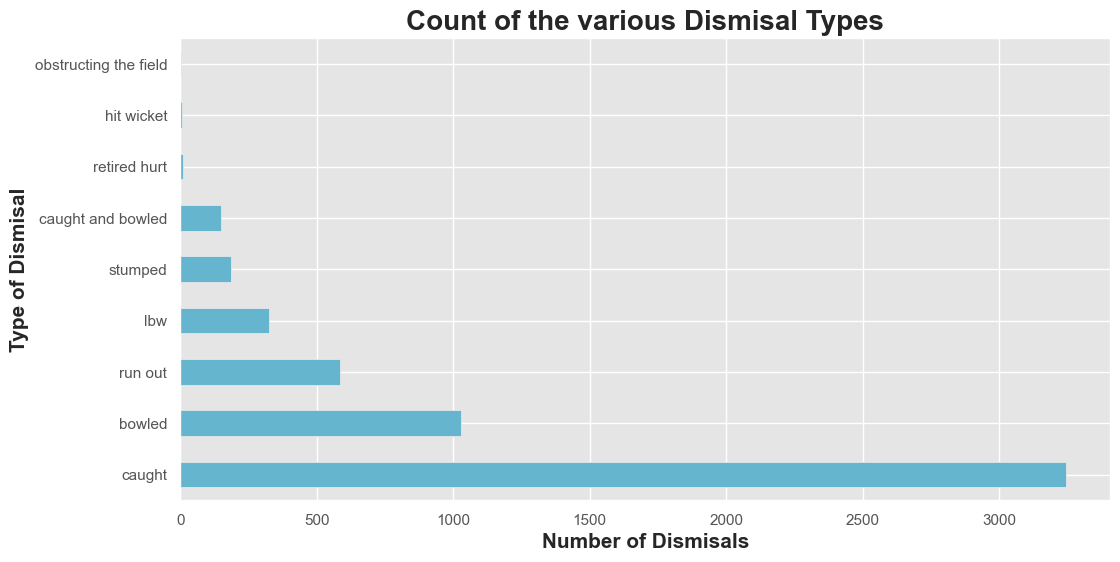

In [10]:
plt.style.use('ggplot')
dismisal_count.plot(kind='barh',figsize=(12,6),color='c')
sns.set_context('talk')
plt.xlabel("Number of Dismisals",fontsize = 15, weight = 'bold')
plt.ylabel("Type of Dismisal",fontsize = 15, weight = 'bold')
plt.title("Count of the various Dismisal Types",fontsize = 20, weight = 'bold')
plt.show()

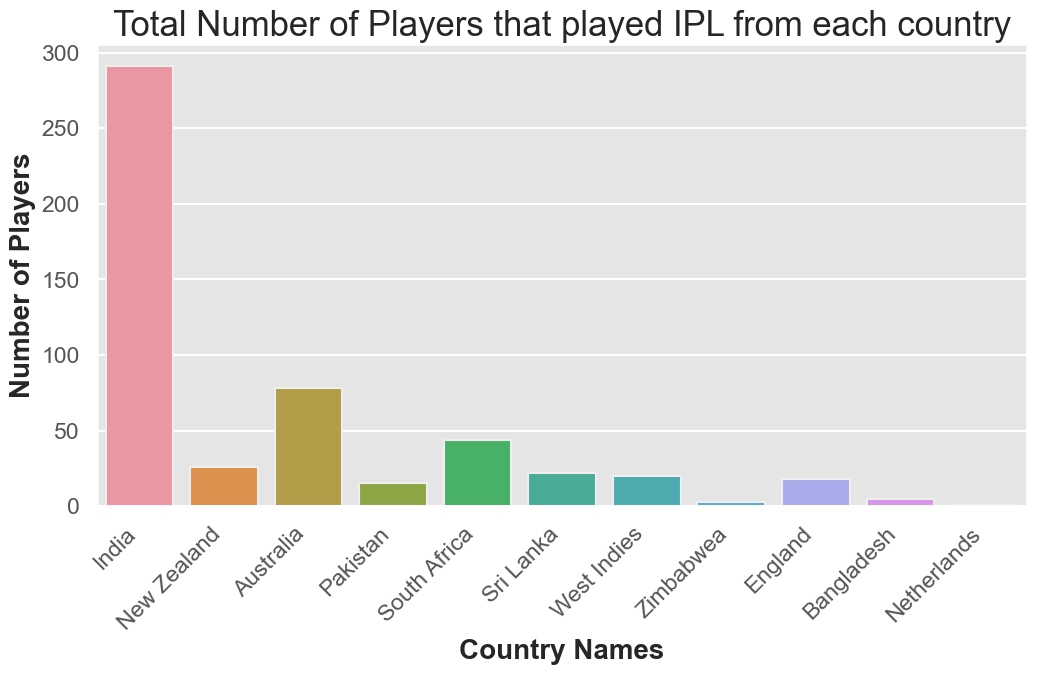

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='Country', data=player)
sns.set_context('talk')
plt.xlabel("Country Names",fontsize=20,weight='bold')
plt.xticks( rotation=45, horizontalalignment='right')
plt.ylabel("Number of Players",fontsize=20,weight='bold')
plt.title("Total Number of Players that played IPL from each country",fontsize=25)
plt.show()

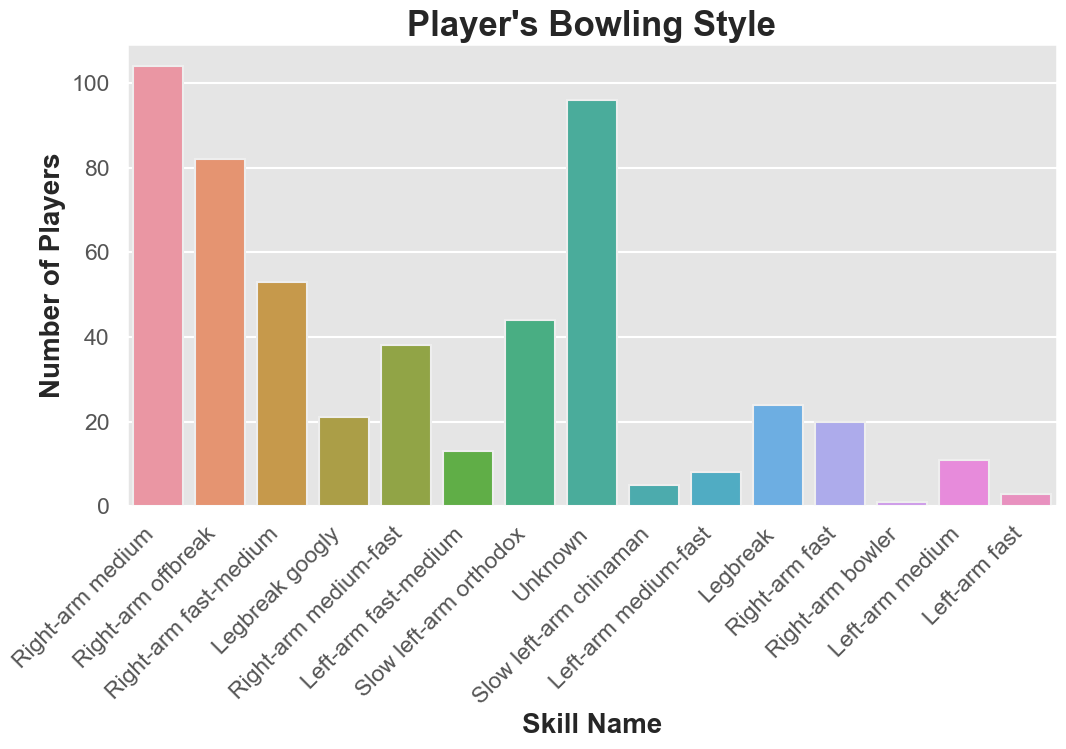

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='Bowling_Skill', data=player)
plt.xticks( rotation=45, horizontalalignment='right')
plt.title("Player's Bowling Style", fontsize=25,weight='bold')
plt.xlabel('Skill Name',fontsize=20,weight='bold')
plt.ylabel('Number of Players',fontsize=20,weight='bold')
plt.show()

In [13]:
player['Bowling_Skill'].value_counts()

Right-arm medium          104
Unknown                    96
Right-arm offbreak         82
Right-arm fast-medium      53
Slow left-arm orthodox     44
Right-arm medium-fast      38
Legbreak                   24
Legbreak googly            21
Right-arm fast             20
Left-arm fast-medium       13
Left-arm medium            11
Left-arm medium-fast        8
Slow left-arm chinaman      5
Left-arm fast               3
Right-arm bowler            1
Name: Bowling_Skill, dtype: int64

Toss Decisions:
field    315
bat      262
Name: Toss_Decision, dtype: int64


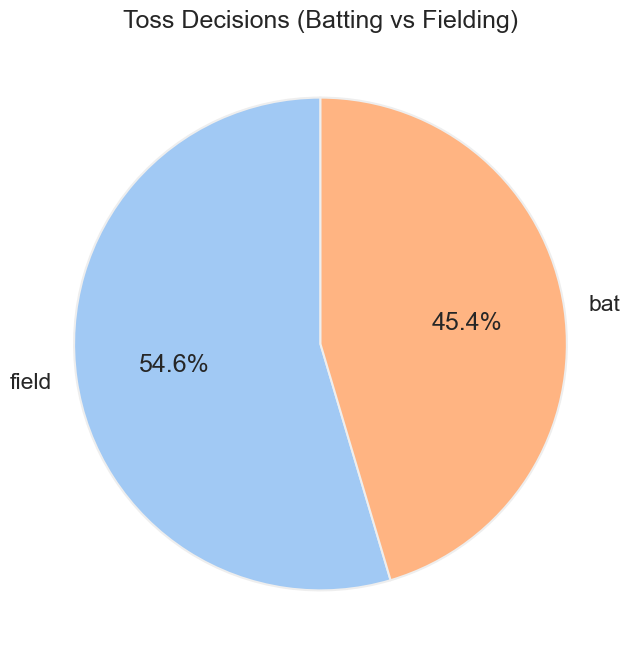

In [14]:
# Count toss decisions
toss_decisions = match["Toss_Decision"].value_counts()
print("Toss Decisions:")
print(toss_decisions)

# Plot toss decisions as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    toss_decisions.values, 
    labels=toss_decisions.index, 
    autopct="%1.1f%%", 
    startangle=90, 
    colors=sns.color_palette("pastel")
)
plt.title("Toss Decisions (Batting vs Fielding)")
plt.show()


Toss Decision Success Rates (%):
Toss_Decision
bat      45.038168
field    54.920635
Name: Toss_Win_And_Match_Win, dtype: float64


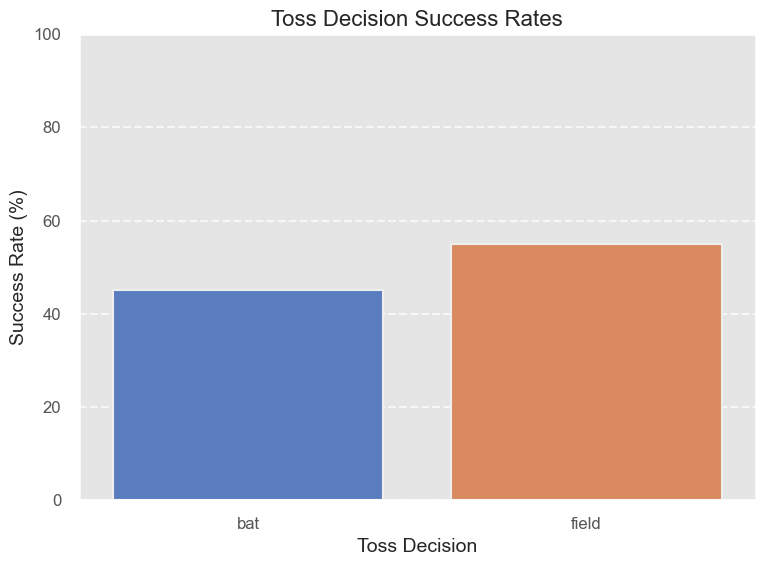

In [15]:
# Analyze success rate of toss decisions
match["Toss_Win_And_Match_Win"] = match["Toss_Winner_Id"] == match["Match_Winner_Id"]
toss_success = match.groupby("Toss_Decision")["Toss_Win_And_Match_Win"].mean() * 100
print("Toss Decision Success Rates (%):")
print(toss_success)

# Plot success rates for toss decisions
plt.figure(figsize=(8, 6))
sns.barplot(x=toss_success.index, y=toss_success.values, palette="muted")
plt.title("Toss Decision Success Rates", fontsize=16)
plt.xlabel("Toss Decision", fontsize=14)
plt.ylabel("Success Rate (%)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)  # Limit the y-axis to 100%
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [16]:
# Merge datasets to include year information
print("Merging datasets to include year information...")
player_years = player_match.merge(match[['Match_Id', 'Season_Id']], on='Match_Id', how='left')
player_years = player_years.merge(team[['Team_Id', 'Team_Name']], on='Team_Id', how='left')

# Merge year information back into merged_data
merged_data_with_years = merged_data.merge(player_years[['Player_Id', 'Team_Name', 'Season_Id']], on=['Player_Id', 'Team_Name'], how='left')

# Remove duplicate entries for the same player in the same team and season
merged_data_with_years = merged_data_with_years.drop_duplicates(subset=['Player_Id', 'Team_Name', 'Season_Id'])

Merging datasets to include year information...


In [17]:

# Display unique team names and seasons
print("Available Teams:")
print(merged_data_with_years['Team_Name'].dropna().unique())
print("\nAvailable Seasons:")
print(sorted(merged_data_with_years['Season_Id'].dropna().unique()))


Available Teams:
['Kolkata Knight Riders' 'Pune Warriors' 'Kochi Tuskers Kerala'
 'Chennai Super Kings' 'Gujarat Lions' 'Mumbai Indians' 'Kings Xi Punjab'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Deccan Chargers'
 'Sunrisers Hyderabad' 'Delhi Daredevils' 'Rising Pune Supergiants']

Available Seasons:
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [18]:
# Function to display players, their stats, team, and season
def show_players_from_team_and_season(team_name, season=None, num_players=None):
    """
    Displays players, their stats, team, and year based on team and season filters.

    Parameters:
    - team_name (str): Name of the team.
    - season (int): Filter players who played in a specific season. If None, displays all seasons.
    - num_players (int): Number of players to display. If None, displays all players.
    """
    # Filter players by team
    team_players = merged_data_with_years[merged_data_with_years['Team_Name'] == team_name]
    
    if season is not None:
        team_players = team_players[team_players['Season_Id'] == season]

    if team_players.empty:
        print(f"No players found for team: {team_name} in season: {season}" if season else f"No players found for team: {team_name}")
    else:
        print(f"Players from {team_name}" + (f" in Season {season}" if season else "") + ":")
        # Display limited number of players if num_players is specified
        if num_players:
            display(team_players[['Player_Name', 'Role', 'Country', 'Season_Id'] + [col for col in merged_data_with_years.columns if col not in ['Player_Name', 'Role', 'Country', 'Season_Id']]].head(num_players))
        else:
            display(team_players[['Player_Name', 'Role', 'Country', 'Season_Id'] + [col for col in merged_data_with_years.columns if col not in ['Player_Name', 'Role', 'Country', 'Season_Id']]])


In [19]:
# Example usage
team_to_display = input("Enter the team name: ")
season_to_display = input("Enter the season number (or leave blank for all seasons): ")
season_to_display = int(season_to_display) if season_to_display.strip() else None
num_to_display = int(input("Enter the number of players to display (or 0 for all): "))
show_players_from_team_and_season(team_to_display, season_to_display, None if num_to_display == 0 else num_to_display)

Players from Mumbai Indians in Season 4:


,Player_Name,Role,Country,Season_Id,Player_Id,total_runs,balls_faced,boundaries,strike_rate,boundary_percentage,total_runs_conceded,balls_bowled,economy_rate,all_rounder_index,Is_Keeper,wickets,Team_Name
3584,Harbhajan Singh,Bowler,India,4,50,783.0,574.0,116.0,136.411150,20.209059,66.0,2687.0,0.147376,407.473252,0,107,Mumbai Indians
3929,A Symonds,Bowler,Australia,4,56,974.0,781.0,115.0,124.711908,14.724712,21.0,528.0,0.238636,271.879763,0,20,Mumbai Indians
3985,RG Sharma,Batsman,India,4,57,3874.0,2996.0,487.0,129.305741,16.255007,9.0,332.0,0.162651,372.060278,0,15,Mumbai Indians
5083,DS Kulkarni,Bowler,India,4,80,89.0,99.0,8.0,89.898990,8.080808,51.0,1313.0,0.233054,259.491979,0,67,Mumbai Indians
7197,MM Patel,Bowler,India,4,126,39.0,40.0,5.0,97.500000,12.500000,51.0,1328.0,0.230422,265.743464,0,55,Mumbai Indians
7419,SR Tendulkar,Batsman,India,4,133,2329.0,2043.0,324.0,113.999021,15.859031,1.0,36.0,0.166667,356.999511,0,0,Mumbai Indians
8464,TL Suman,All-Rounder,India,4,178,676.0,587.0,81.0,115.161840,13.798978,4.0,152.0,0.157895,374.247587,0,6,Mumbai Indians
9054,SL Malinga,Bowler,Sri Lanka,4,194,81.0,100.0,10.0,81.000000,10.000000,105.0,2318.0,0.271786,224.468254,0,120,Mumbai Indians
9448,AT Rayudu,Batsman,India,4,208,2325.0,1884.0,274.0,123.407643,14.543524,NaN,NaN,NaN,NaN,0,0,Mumbai Indians
9664,R Sathish,Batsman,India,4,209,270.0,236.0,28.0,114.406780,11.864407,0.0,139.0,0.000000,inf,0,3,Mumbai Indians


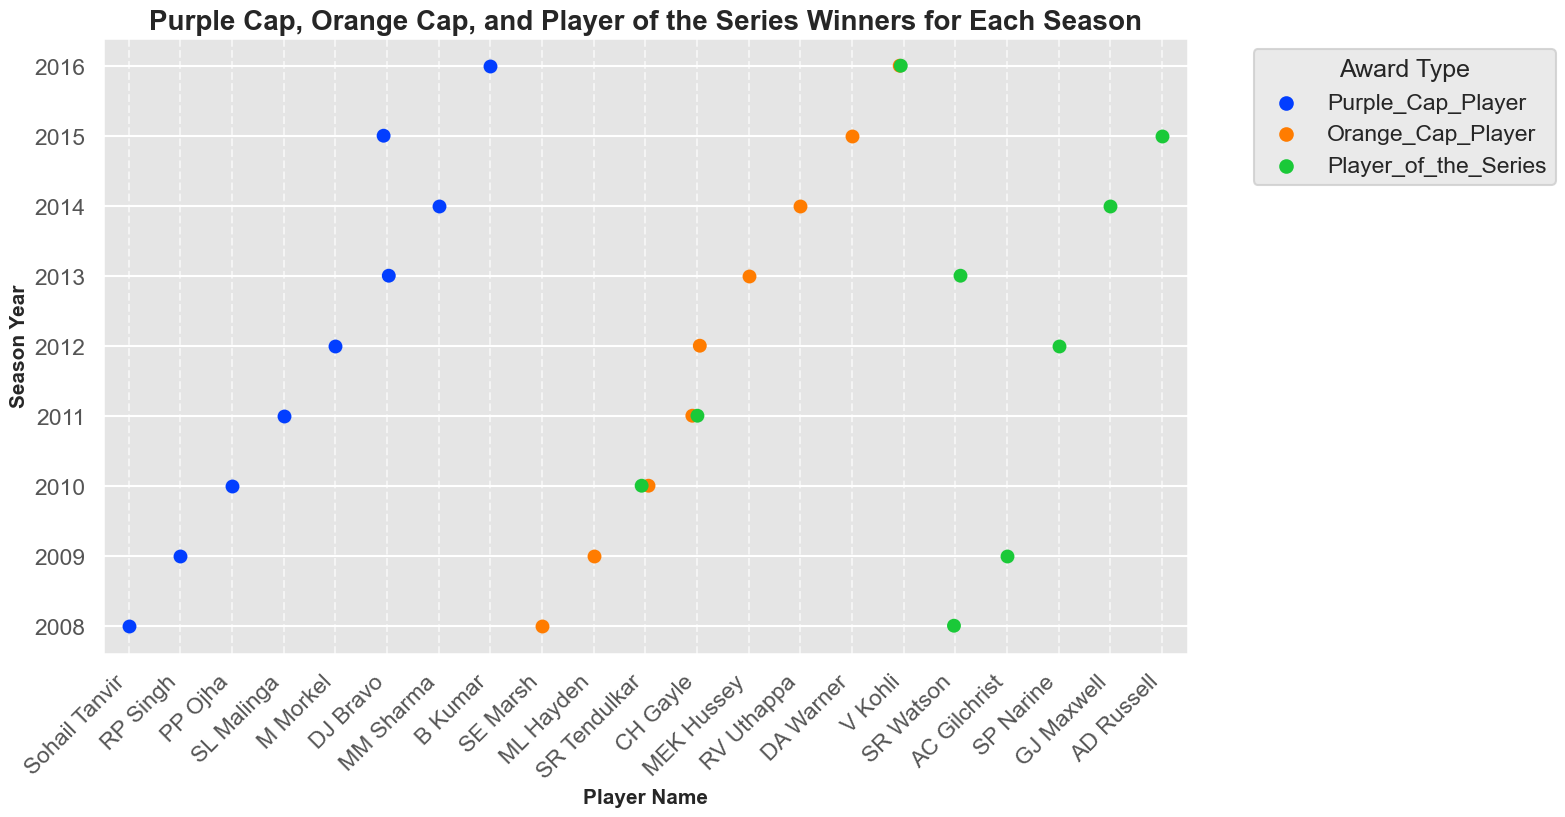

In [20]:
# Map player names to Purple Cap, Orange Cap, and Player of the Series IDs
season["Purple_Cap_Player"] = season["Purple_Cap_Id"].map(player_names)
season["Orange_Cap_Player"] = season["Orange_Cap_Id"].map(player_names)
season["Player_of_the_Series"] = season["Man_of_the_Series_Id"].map(player_names)

# Create a long-format dataframe for visualization
awards_data = season.melt(
    id_vars=["Season_Year"],
    value_vars=["Purple_Cap_Player", "Orange_Cap_Player", "Player_of_the_Series"],
    var_name="Award_Type",
    value_name="Player_Name"
)

# Plot the strip plot
plt.figure(figsize=(14, 8))
sns.stripplot(data=awards_data, x="Player_Name", y="Season_Year", hue="Award_Type", jitter=True, size=10, palette="bright")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Player Name", fontsize=15, weight="bold")
plt.ylabel("Season Year", fontsize=15, weight="bold")
plt.title("Purple Cap, Orange Cap, and Player of the Series Winners for Each Season", fontsize=20, weight="bold")
plt.legend(title="Award Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


In [21]:
print("Actual columns in awards_summary DataFrame:", awards_data.columns.tolist())


Actual columns in awards_summary DataFrame: ['Season_Year', 'Award_Type', 'Player_Name']


In [22]:
# Print awards and player names
print("Season Year | Award Type          | Player Name")
print("-" * 40)
for index, row in awards_data.iterrows():
    print(f"{row['Season_Year']:^11} | {row['Award_Type']:^20} | {row['Player_Name']:^15}")


Season Year | Award Type          | Player Name
----------------------------------------
   2008     |  Purple_Cap_Player   |  Sohail Tanvir 
   2009     |  Purple_Cap_Player   |    RP Singh    
   2010     |  Purple_Cap_Player   |     PP Ojha    
   2011     |  Purple_Cap_Player   |   SL Malinga   
   2012     |  Purple_Cap_Player   |    M Morkel    
   2013     |  Purple_Cap_Player   |    DJ Bravo    
   2014     |  Purple_Cap_Player   |    MM Sharma   
   2015     |  Purple_Cap_Player   |    DJ Bravo    
   2016     |  Purple_Cap_Player   |     B Kumar    
   2008     |  Orange_Cap_Player   |    SE Marsh    
   2009     |  Orange_Cap_Player   |    ML Hayden   
   2010     |  Orange_Cap_Player   |  SR Tendulkar  
   2011     |  Orange_Cap_Player   |    CH Gayle    
   2012     |  Orange_Cap_Player   |    CH Gayle    
   2013     |  Orange_Cap_Player   |   MEK Hussey   
   2014     |  Orange_Cap_Player   |   RV Uthappa   
   2015     |  Orange_Cap_Player   |    DA Warner   
   2016   

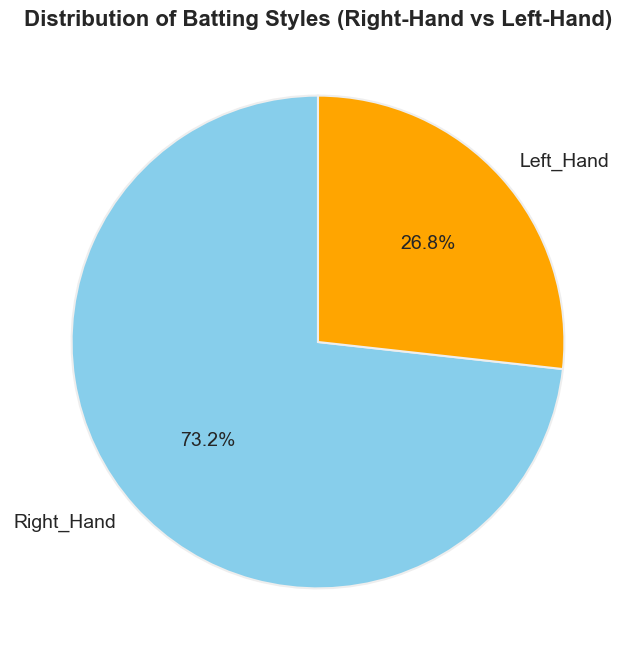

In [23]:

# Filter out "Unknown" batting style and count valid styles
batting_styles = player["Batting_Hand"].value_counts()
batting_styles = batting_styles[batting_styles.index != "Unknown"]  # Exclude "Unknown"

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    batting_styles.values,
    labels=batting_styles.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "orange"],
    textprops={"fontsize": 14}
)
plt.title("Distribution of Batting Styles (Right-Hand vs Left-Hand)", fontsize=16, weight="bold")
plt.show()
